# GenerativeAI4DS-I
## Lab. Image Processing

##  What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you have to consume OpenAI services.
* Follow OpenAI's best practices on how to process audio and video

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [2]:
from IPython.display import display, Image, Audio, HTML

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests

In [3]:
def show_json(obj):
    display(json.loads(obj.model_dump_json()))

In [4]:
# We need this to load the files onto google colab
!git clone https://github.com/thousandoaks/GenerativeAI4DS-I.git

Cloning into 'GenerativeAI4DS-I'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 97 (delta 33), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (97/97), 3.36 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (33/33), done.


# 1. You have to get your [OpenAI API Key](https://platform.openai.com/account/api-keys)

In [6]:
# Used by the agent in this tutorial
os.environ["OPENAI_API_KEY"] = "YOU-NEED-YOUR-OWN-KEY"

In [7]:
client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

# 2. Image Processing

GPT-4o can directly process images and take intelligent actions based on the image. We can provide images in two formats: Base64 Encoded, URL
Let's first view the image we'll use, then try sending this image as both Base64 and as a URL link to the API

### 2.1. Image Loading
#### First, we load the image from a local repository

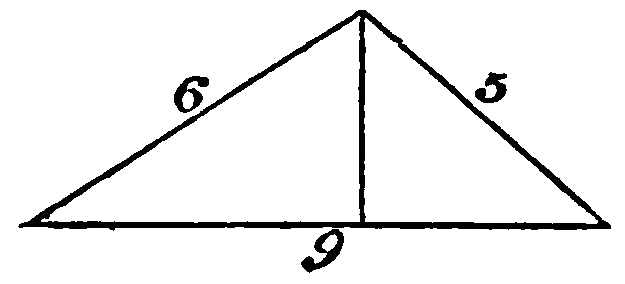

In [8]:
display(Image('/content/GenerativeAI4DS-I/datasets/triangle.jpeg'))

In [9]:
# Function to encode the image as base64
def encode_image(image_path: str):
    # check if the image exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [10]:
base64_img = encode_image('/content/GenerativeAI4DS-I/datasets/triangle.jpeg')


### 2.2. Image Processing
#### Once we have the image ready, we craft our prompt and send a request to GPT

In [19]:
response = client.chat.completions.create(
    model='gpt-4o',
    messages=[
        {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "Which figure is it?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_img}"}
            }
        ]}
    ],
    temperature=0.0,
)


In [20]:
print(response.choices[0].message.content)

The figure is a triangle. Specifically, it appears to be an isosceles triangle, as it has two sides of equal length (6 and 5) and a base of length 9. The vertical line from the top vertex to the base suggests that it is also divided into two right triangles.


In [21]:
response = client.chat.completions.create(
    model='gpt-4o',
    messages=[
        {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_img}"}
            }
        ]}
    ],
    temperature=0.0,
)





In [22]:
print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. Heron's formula states that the area of a triangle with sides \(a\), \(b\), and \(c\) is:

\[ \text{Area} = \sqrt{s(s-a)(s-b)(s-c)} \]

where \(s\) is the semi-perimeter of the triangle:

\[ s = \frac{a + b + c}{2} \]

In this triangle, the sides are \(a = 6\), \(b = 5\), and \(c = 9\).

First, calculate the semi-perimeter \(s\):

\[ s = \frac{6 + 5 + 9}{2} = \frac{20}{2} = 10 \]

Now, apply Heron's formula:

\[ \text{Area} = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ \text{Area} = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} \]
\[ \text{Area} = \sqrt{200} \]
\[ \text{Area} = 10\sqrt{2} \]

So, the area of the triangle is \(10\sqrt{2}\) square units.
